# Importing Libraries & Data

In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
with_mask='/kaggle/input/face-mask-dataset/data/with_mask'
without_mask='/kaggle/input/face-mask-dataset/data/without_mask'
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

Number
with_mask       3725
without_mask    3828

In [4]:
def size_path(path):
    size=[]
    for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            size.append(img_array.shape)
    return pd.DataFrame(pd.Series(size).value_counts(),columns=['Number']) 

In [6]:
#with_mask
size_path(with_mask)

Number
(225, 225, 3)     434
(428, 320, 3)     162
(100, 100, 3)     149
(275, 183, 3)      86
(183, 275, 3)      85
...               ...
(134, 100, 3)       1
(138, 94, 3)        1
(131, 97, 3)        1
(86, 73, 3)         1
(94, 78, 3)         1

[1726 rows x 1 columns]

In [7]:
#without_mask
size_path(without_mask)

Number
(225, 225, 3)     230
(428, 320, 3)     219
(275, 183, 3)     169
(183, 275, 3)      96
(259, 194, 3)      85
...               ...
(125, 150, 3)       1
(218, 200, 3)       1
(122, 125, 3)       1
(153, 159, 3)       1
(150, 143, 3)       1

[1263 rows x 1 columns]

In [8]:
Size=150
code={'with_mask':0,'without_mask':1}
def get_Name(N):
    for x,y in code.items():
          if y==N:
                return x

In [13]:
def load(path):
    label=[]
    data=[]
    temp=path.split('/')[-1]
    for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            img_array=cv2.resize(img_array,(Size,Size))
            label.append(code[temp])
            data.append(img_array)
    return label,data 

In [19]:
#with_mask
label_with,data_with=load(with_mask)
#without_mask
label_without,data_without=load(without_mask)

In [24]:
data=data_with+data_without
label=label_with+label_without
label=pd.DataFrame(label,columns=['Label'])
label

Label
0         0
1         0
2         0
3         0
4         0
...     ...
7548      1
7549      1
7550      1
7551      1
7552      1

[7553 rows x 1 columns]

In [25]:
pd.DataFrame(label).value_counts()

Label
1        3828
0        3725
dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Labels')

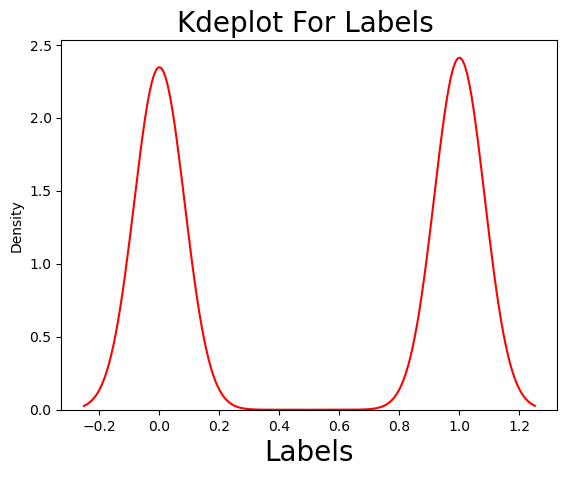

In [32]:
sns.kdeplot(label['Label'],shade = False , color = "red")
plt.title('Kdeplot For Labels ',fontsize=20)
plt.xlabel('Labels',fontsize=20)

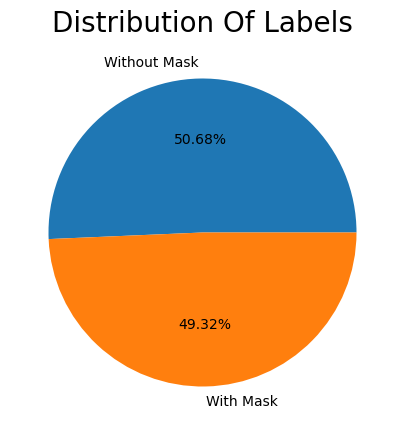

In [35]:
plt.figure(figsize=(5,5))
plt.pie(label['Label'].value_counts(),labels=['Without Mask','With Mask'],autopct ='%1.2f%%')
plt.title('Distribution Of Labels',fontsize=20)
plt.show()

In [36]:
def show(data,y):
    plt.figure(figsize=(25,25))
    i=1
    for x in np.random.randint(0,len(data),50):
        plt.subplot(10,5,i)
        plt.imshow(data[x])
        plt.title(f'Label {get_Name(y[x])}',fontsize=15)
        plt.axis('off')    
        i+=1 

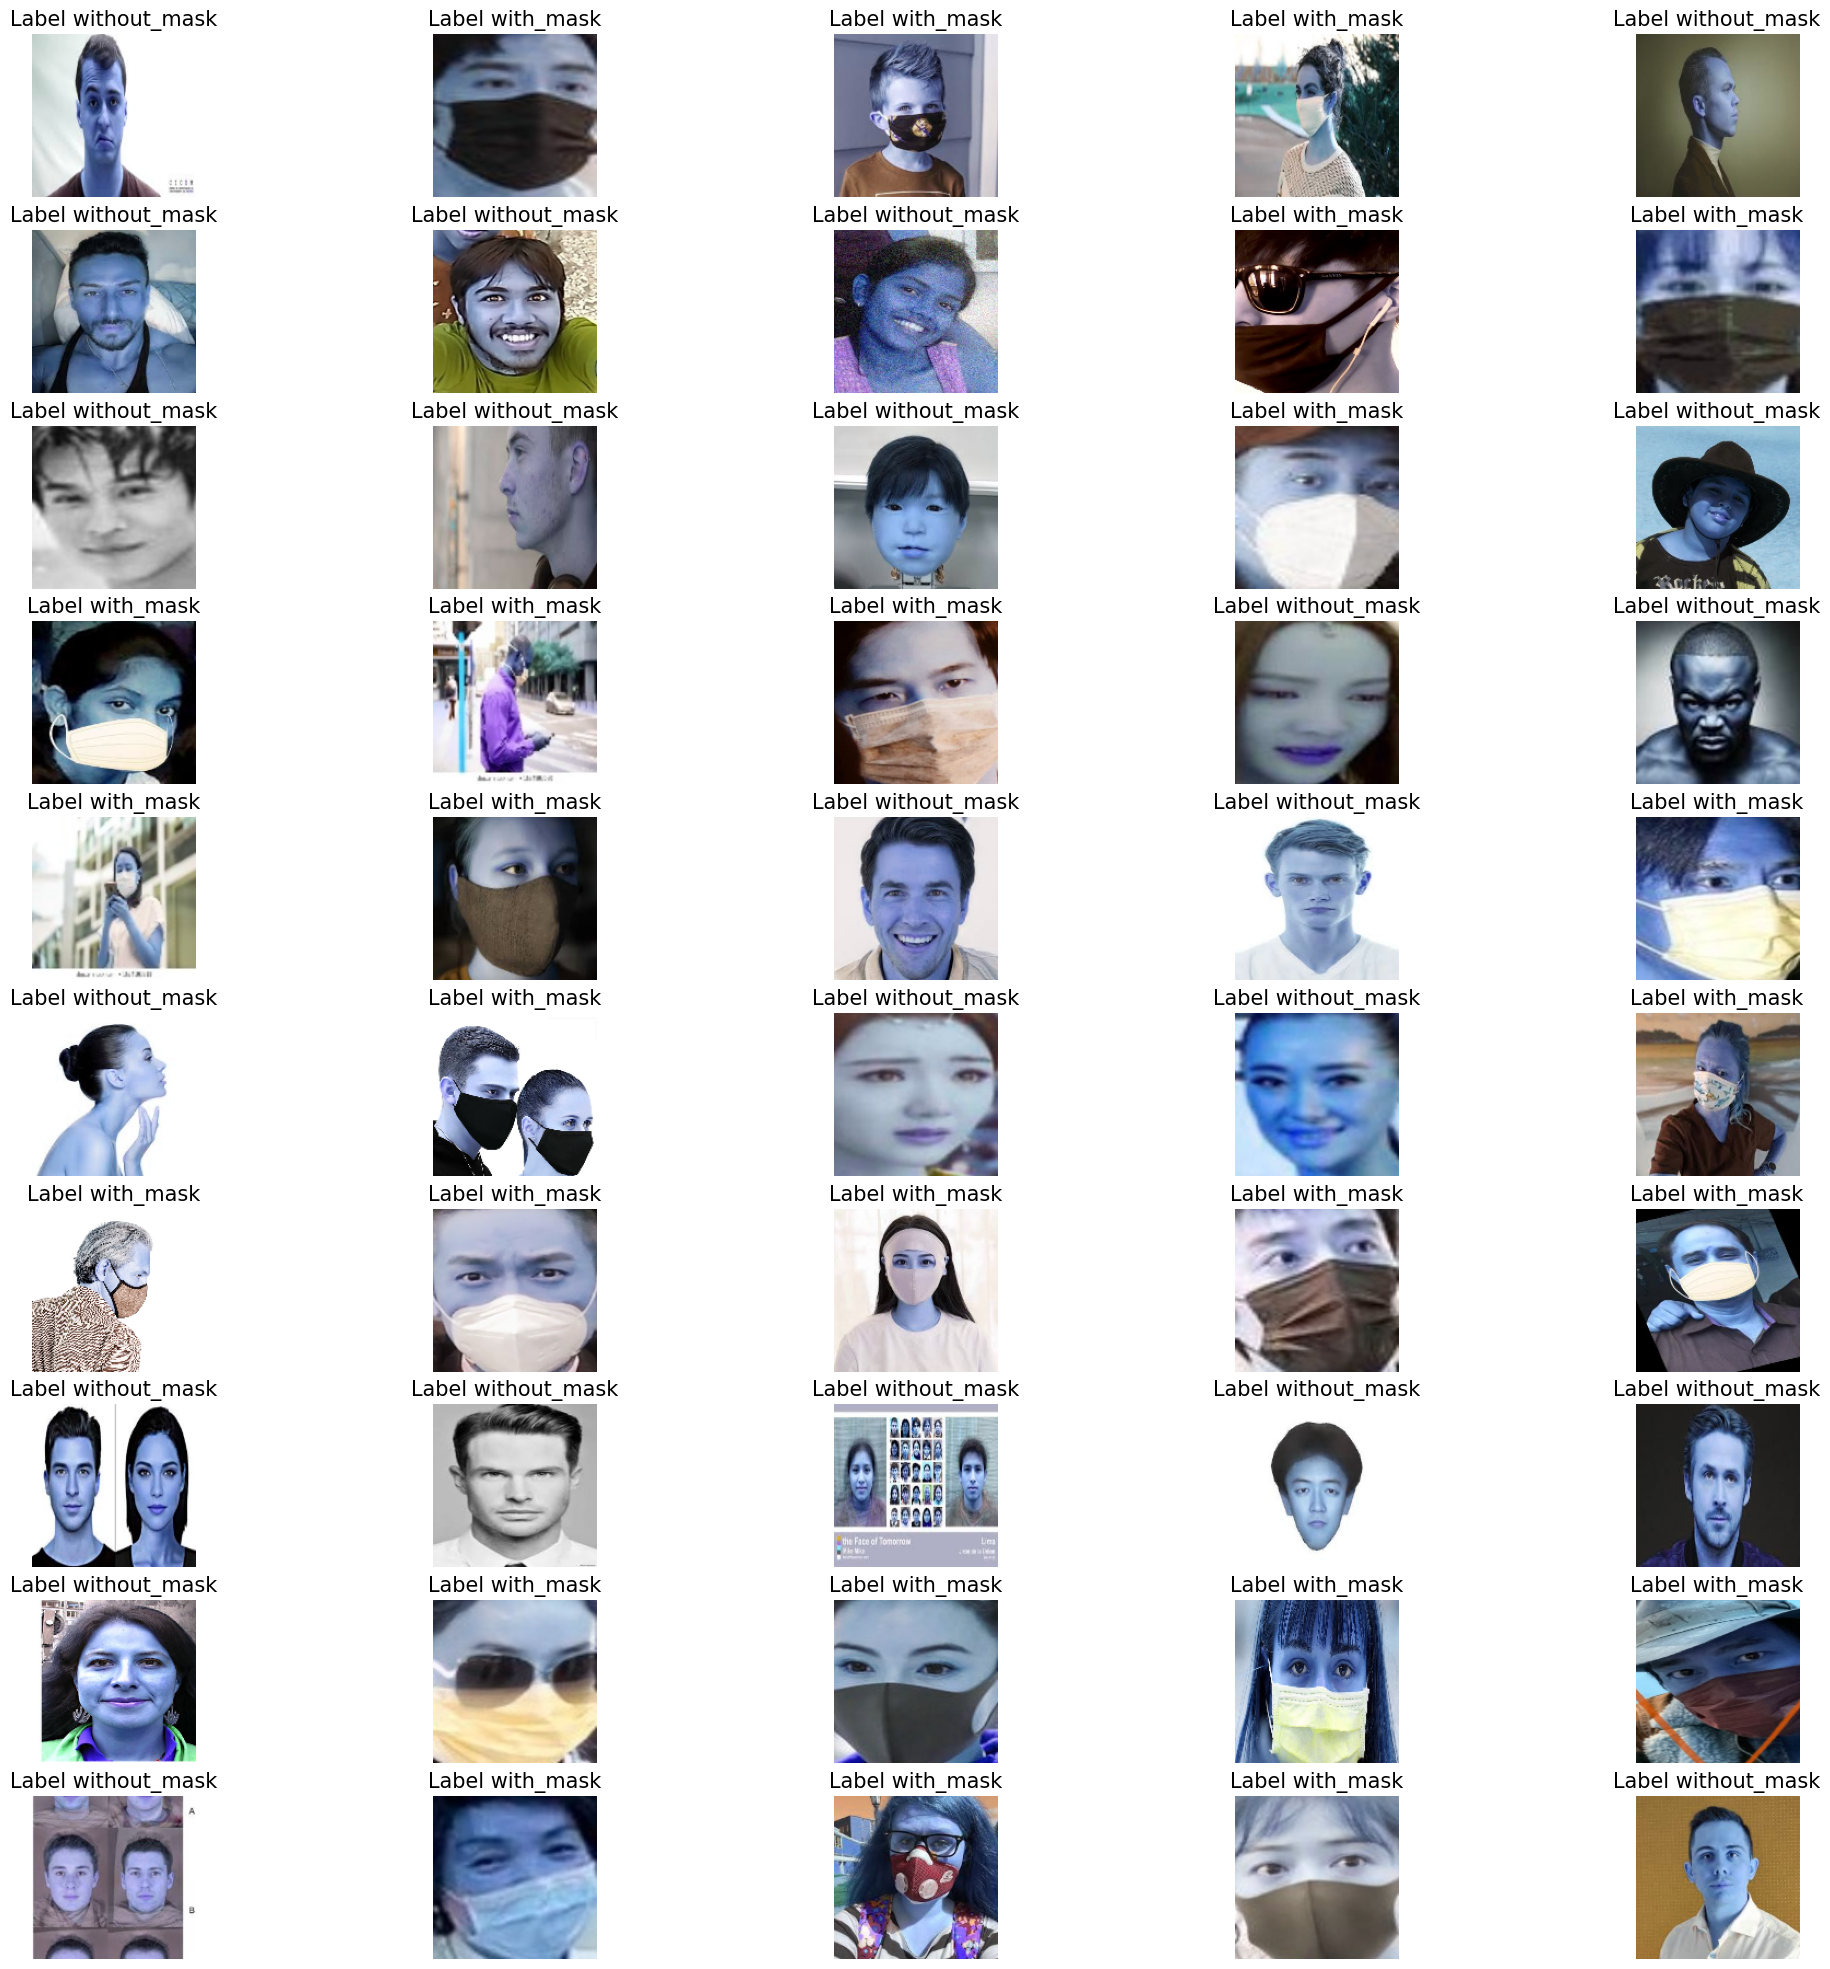

In [38]:
#show
show(data,label['Label'])

# Building Model

In [39]:
data=np.array(data)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.15,random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (6420, 150, 150, 3)
X_test shape is  (1133, 150, 150, 3)
y_train shape is  (6420, 1)
y_test shape is  (1133, 1)


In [45]:
class_num=2
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(class_num,activation=tf.nn.softmax))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 47, 47, 64)       2

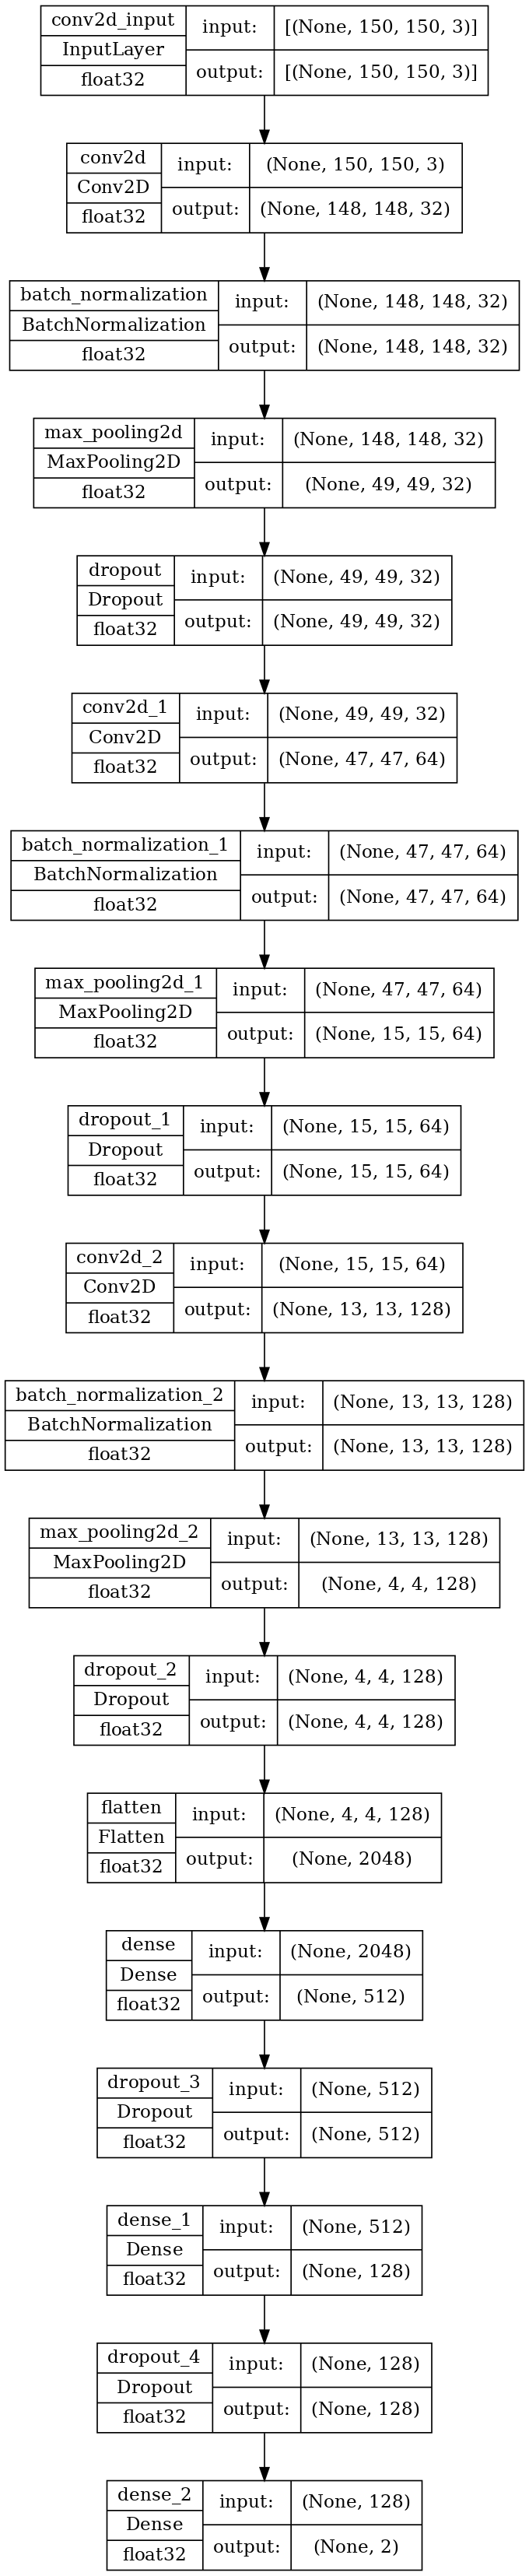

In [47]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [54]:
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=50,validation_split = 0.1)

Epoch 1/50
181/181 [==============================] - 5s 23ms/step - loss: 0.1287 - accuracy: 0.9609 - val_loss: 0.1395 - val_accuracy: 0.9502
Epoch 2/50
181/181 [==============================] - 4s 21ms/step - loss: 0.1090 - accuracy: 0.9635 - val_loss: 0.2246 - val_accuracy: 0.9393
Epoch 3/50
181/181 [==============================] - 4s 22ms/step - loss: 0.1100 - accuracy: 0.9611 - val_loss: 0.1742 - val_accuracy: 0.9533
Epoch 4/50
181/181 [==============================] - 4s 21ms/step - loss: 0.0896 - accuracy: 0.9697 - val_loss: 0.0865 - val_accuracy: 0.9642
Epoch 5/50
181/181 [==============================] - 4s 22ms/step - loss: 0.0896 - accuracy: 0.9732 - val_loss: 0.1776 - val_accuracy: 0.9486
Epoch 6/50
181/181 [==============================] - 4s 22ms/step - loss: 0.0738 - accuracy: 0.9730 - val_loss: 0.1730 - val_accuracy: 0.9564
Epoch 7/50
181/181 [==============================] - 4s 22ms/step - loss: 0.0607 - accuracy: 0.9803 - val_loss: 0.7266 - val_accuracy: 0.8894

In [55]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

36/36 [==============================] - 0s 10ms/step - loss: 0.1690 - accuracy: 0.9735
Test Loss = 0.16899332404136658
Test Accuracy = 0.9735216498374939


In [56]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0   0.128685  0.960886  0.139455      0.950156
1   0.109006  0.963482  0.224591      0.939252
2   0.110041  0.961059  0.174156      0.953271
3   0.089635  0.969713  0.086450      0.964174
4   0.089575  0.973174  0.177566      0.948598
5   0.073758  0.973001  0.173035      0.956386
6   0.060727  0.980270  0.726620      0.889408
7   0.057565  0.980097  0.146251      0.957944
8   0.066548  0.978020  0.433932      0.929907
9   0.055015  0.980789  0.126438      0.961059
10  0.044065  0.984597  0.132459      0.962617
11  0.052801  0.984078  0.240952      0.965732
12  0.054751  0.980789  0.245891      0.939252
13  0.047917  0.985289  0.194461      0.951713
14  0.035263  0.986847  0.277847      0.922118
15  0.046202  0.985462  0.089111      0.967290
16  0.033513  0.988750  0.098420      0.964174
17  0.032525  0.988750  0.193769      0.950156
18  0.028173  0.991000  0.134382      0.967290
19  0.029980  0.991173  0.319750      0.953271
20  0.027107  0.990481  0.119789      0.976636
21  0.031052  0.989270  0.424761      0.929907
22  0.023945  0.993077  0.244422      0.971963
23  0.028630  0.991346  0.079271      0.973520
24  0.028836  0.991000  0.086738      0.976636
25  0.027556  0.992558  0.157237      0.962617
26  0.022817  0.991866  0.175421      0.965732
27  0.024057  0.991866  0.188039      0.967290
28  0.025597  0.991693  0.198431      0.962617
29  0.015977  0.994116  0.155488      0.959502
30  0.018654  0.993250  0.308058      0.956386
31  0.031960  0.990481  0.178213      0.954829
32  0.022464  0.993423  0.464224      0.947040
33  0.029357  0.990308  0.149899      0.965732
34  0.029062  0.991520  0.362513      0.950156
35  0.021423  0.993077  0.108991      0.970405
36  0.009891  0.996712  0.231185      0.973520
37  0.023288  0.992904  1.045773      0.911215
38  0.018550  0.993596  0.121465      0.976636
39  0.027043  0.992212  0.135358      0.971963
40  0.014847  0.995154  0.200683      0.957944
41  0.028820  0.992731  0.181155      0.970405
42  0.024880  0.992039  0.109897      0.979751
43  0.014938  0.994808  0.122775      0.970405
44  0.021252  0.993250  0.155586      0.967290
45  0.016487  0.994981  0.128962      0.973520
46  0.009266  0.996885  0.132524      0.979751
47  0.011020  0.996192  0.123183      0.978193
48  0.016685  0.994462  0.113831      0.970405
49  0.012061  0.996712  0.134871      0.978193

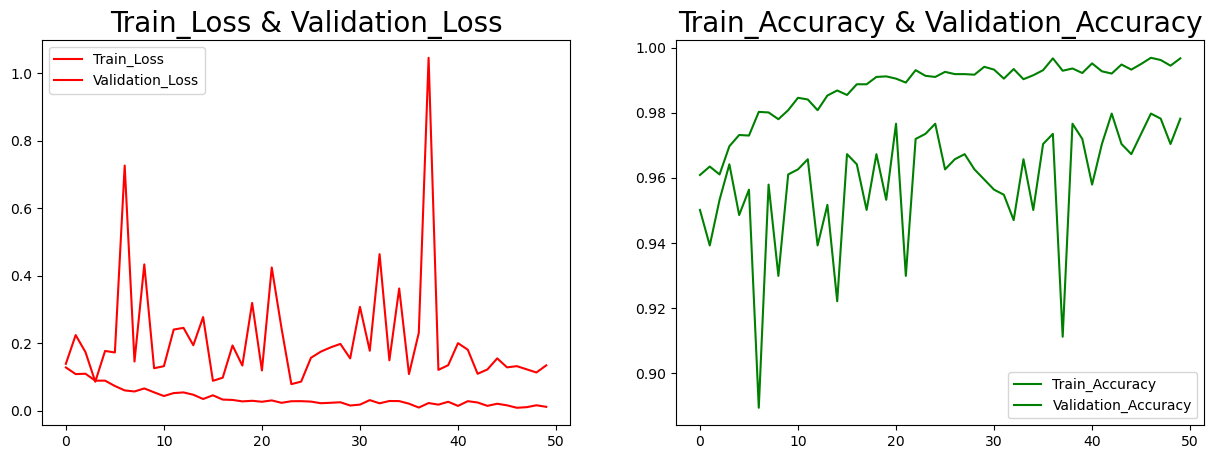

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],c='r',label='Train_Loss')
plt.plot(hist_['val_loss'],c='r',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],c='green',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],c='green',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

# Prediction

In [58]:
prediction = model.predict(X_test)
prediction[0]

36/36 [==============================] - 0s 6ms/step


array([2.6282721e-17, 1.0000000e+00], dtype=float32)

In [59]:
pred_name=[]
pred=[]
for row in prediction:
    N=np.argmax(row)
    pred_name.append(get_Name(N))
    pred.append(N)
df=pd.DataFrame()  
df['actual_label'],df['predict_label'],df['predict_name']=y_test,pred,pred_name
df

actual_label  predict_label  predict_name
6790             1              1  without_mask
3984             1              1  without_mask
1420             0              0     with_mask
3850             1              1  without_mask
1492             0              0     with_mask
...            ...            ...           ...
4332             1              1  without_mask
3713             0              0     with_mask
2250             0              1  without_mask
5956             1              1  without_mask
1633             0              0     with_mask

[1133 rows x 3 columns]

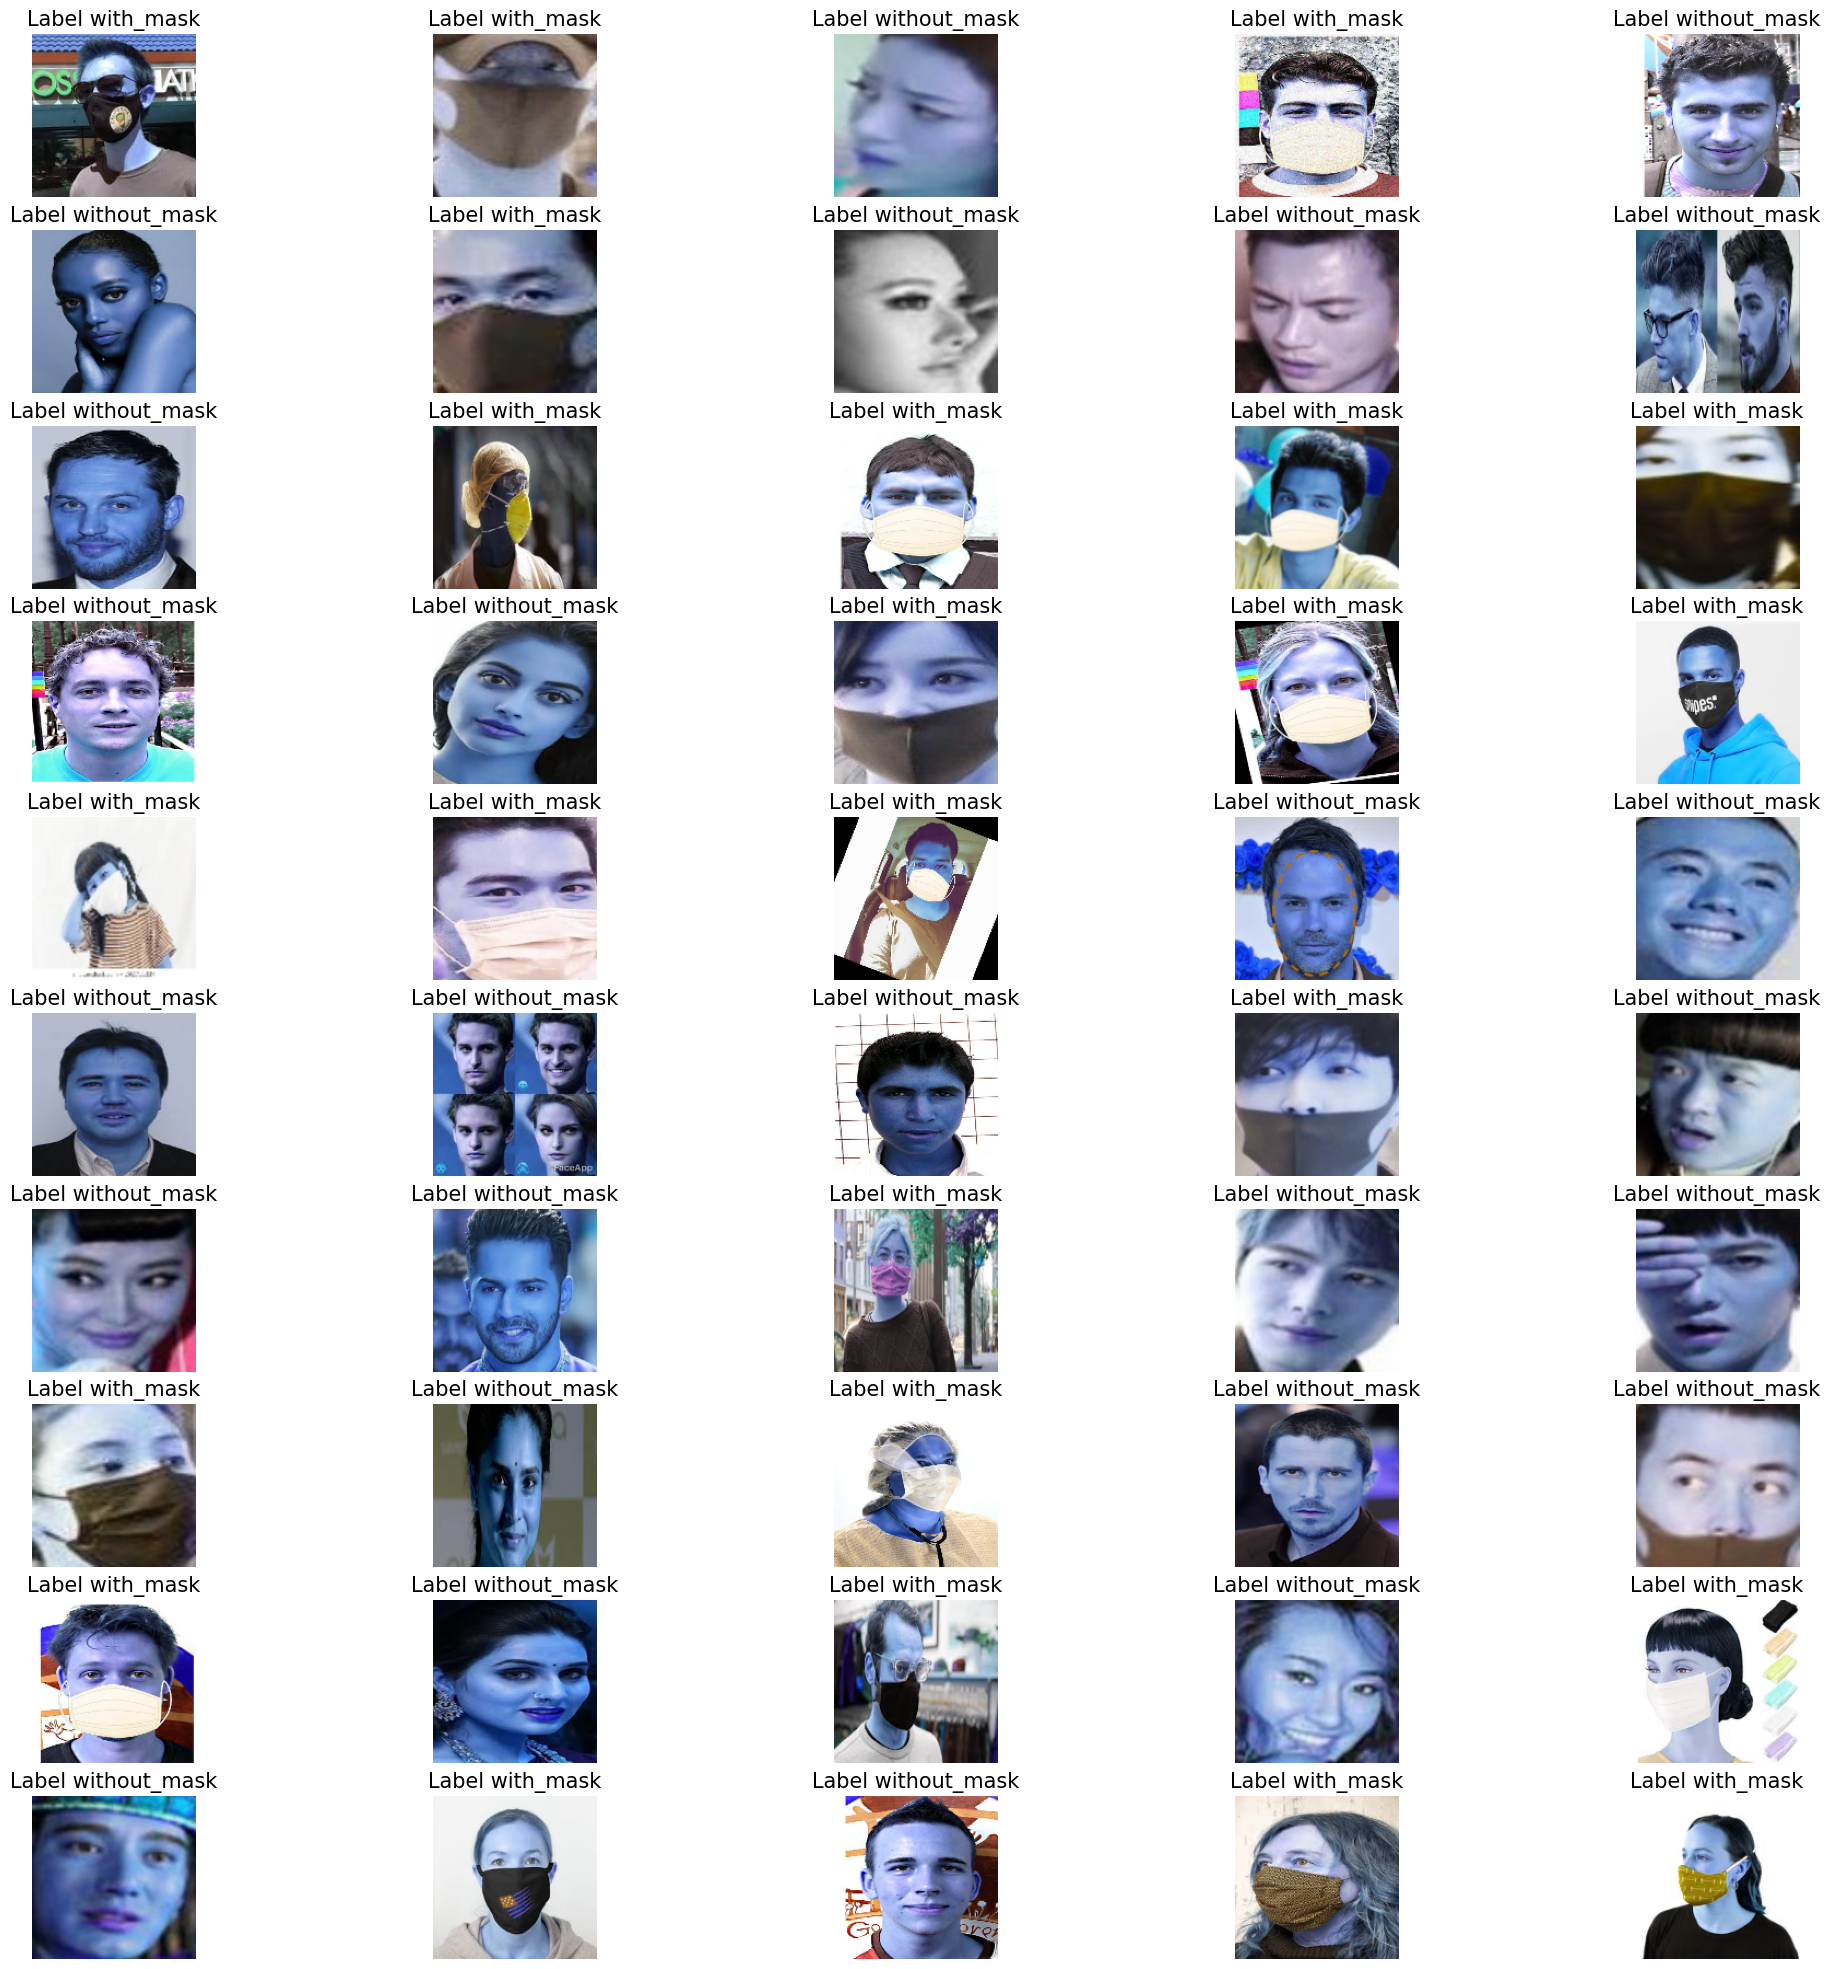

In [60]:
show(X_test,pred)

# Model Check

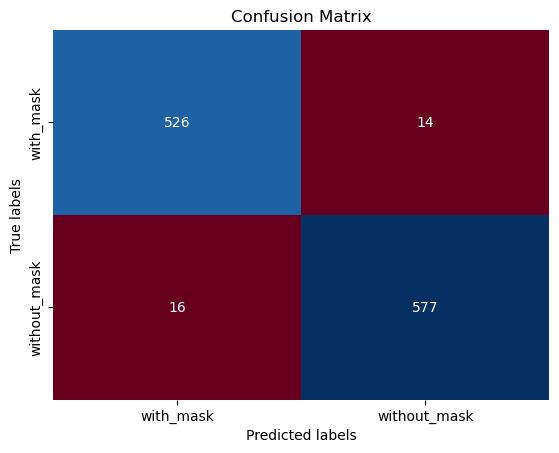

array([[526,  14],
       [ 16, 577]])

In [61]:
ax= plt.subplot()
CM = confusion_matrix(y_test,pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(code.keys()) 
ax.yaxis.set_ticklabels(code.keys())
plt.show()
CM

In [62]:
ClassificationReport = classification_report(y_test,pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.97      0.97      0.97       540
           1       0.98      0.97      0.97       593

    accuracy                           0.97      1133
   macro avg       0.97      0.97      0.97      1133
weighted avg       0.97      0.97      0.97      1133



# Save Model

In [65]:
model.save('/kaggle/working/model.h5')